In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_nakamura = pd.read_csv('df_nakamura_limpio.csv')
df_nakamura['date_played'] = pd.to_datetime(df_nakamura['date_played'])
df_nakamura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4811 non-null   int64         
 1   event        4811 non-null   object        
 2   site         4811 non-null   object        
 3   date_played  4811 non-null   datetime64[ns]
 4   white        4811 non-null   object        
 5   black        4811 non-null   object        
 6   result       4811 non-null   object        
 7   white_elo    4782 non-null   float64       
 8   black_elo    4769 non-null   float64       
 9   winner       4811 non-null   object        
 10  loser        4811 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 413.6+ KB


In [3]:
df_nakamura.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser
0,0,Wch U10,Cannes,1997-01-01,"Bellaiche, Antony","Nakamura, Hikaru",1-0,NaN,NaN,"Bellaiche, Antony","Nakamura, Hikaru"
1,1,Wch U10,Cannes,1997-01-01,"Nakamura, Hikaru","El Mikati, Mohamad",1-0,NaN,NaN,"Nakamura, Hikaru","El Mikati, Mohamad"
2,2,Wch U10,Cannes,1997-01-01,"Nakamura, Hikaru","Eryomenko, Volodymyr",1-0,NaN,NaN,"Nakamura, Hikaru","Eryomenko, Volodymyr"
3,3,Wch U10,Cannes,1997-01-01,"Amin, Bassem","Nakamura, Hikaru",1-0,NaN,NaN,"Amin, Bassem","Nakamura, Hikaru"
4,4,Wch U10,Cannes,1997-01-01,"Lepan, Marvin","Nakamura, Hikaru",0-1,NaN,NaN,"Nakamura, Hikaru","Lepan, Marvin"


In [12]:
def resultado(value):
    name = 'Nakamura, Hikaru'
    name1 = 'Nakamura,Hi'
    name2 = 'Nakamura,H'
    if value == name or value == name1 or value == name2:
        return 'Victory'
    elif value == 'draw':
        return 'Draw'
    else:
        return 'Defeat'

In [13]:
df_nakamura['resultado'] = df_nakamura['winner'].transform(resultado)
df_nakamura['resultado'].unique()

array(['Defeat', 'Victory', 'Draw'], dtype=object)

In [8]:
df_nakamura.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser,resultado
0,0,Wch U10,Cannes,1997-01-01,"Bellaiche, Antony","Nakamura, Hikaru",1-0,NaN,NaN,"Bellaiche, Antony","Nakamura, Hikaru",Defeat
1,1,Wch U10,Cannes,1997-01-01,"Nakamura, Hikaru","El Mikati, Mohamad",1-0,NaN,NaN,"Nakamura, Hikaru","El Mikati, Mohamad",Victory
2,2,Wch U10,Cannes,1997-01-01,"Nakamura, Hikaru","Eryomenko, Volodymyr",1-0,NaN,NaN,"Nakamura, Hikaru","Eryomenko, Volodymyr",Victory
3,3,Wch U10,Cannes,1997-01-01,"Amin, Bassem","Nakamura, Hikaru",1-0,NaN,NaN,"Amin, Bassem","Nakamura, Hikaru",Defeat
4,4,Wch U10,Cannes,1997-01-01,"Lepan, Marvin","Nakamura, Hikaru",0-1,NaN,NaN,"Nakamura, Hikaru","Lepan, Marvin",Victory


visctorias vs derrotas


C:\Users\franc\AppData\Local\Temp\ipykernel_25420\2487892464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_nakamura['resultado'].value_counts().index, y= df_nakamura['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10')


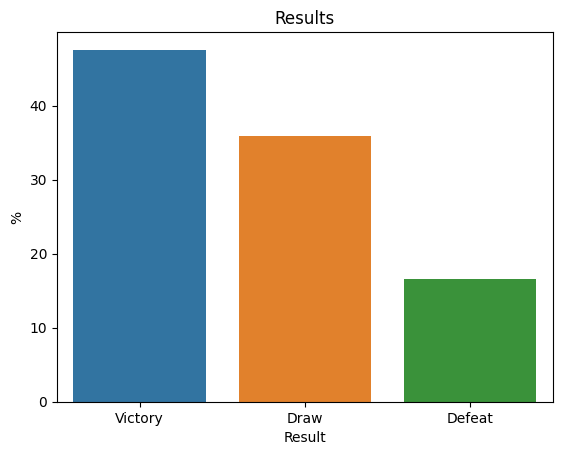

In [16]:
sns.barplot(x= df_nakamura['resultado'].value_counts().index, y= df_nakamura['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10')
plt.title('Results') 
plt.xlabel('Result')  
plt.ylabel('%')  
#plt.savefig('resultados_nakamura.png')

In [17]:
df_nakamura[df_nakamura['resultado'] == 'Defeat']['winner'].value_counts()

winner
Carlsen,M                          85
Vachier Lagrave,M                  41
So,W                               41
Aronian,L                          34
Caruana,F                          32
                                   ..
Dominguez,L                         1
Peterson,W                          1
Baginskaite,C                       1
Laxman,R                            1
Martinez Alcantara,Jose Eduardo     1
Name: count, Length: 252, dtype: int64

nakamura vs carlsen

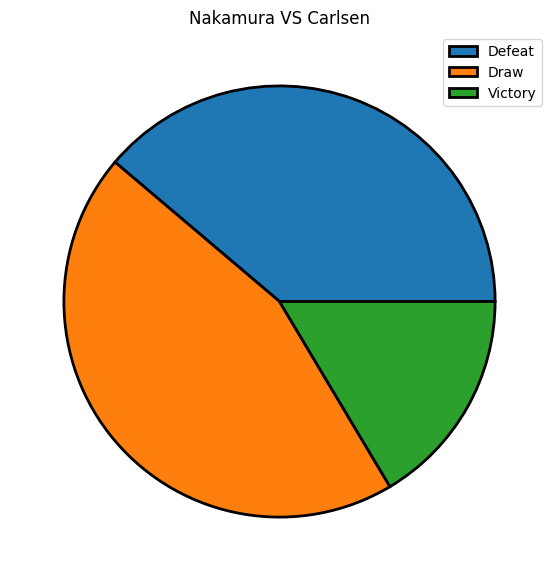

In [19]:
df_rival = df_nakamura[(df_nakamura['white'] == 'Carlsen,M') | (df_nakamura['black'] == 'Carlsen,M')]

res_nakamura_carlsen = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_nakamura_carlsen.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Nakamura VS Carlsen')
plt.legend(res_nakamura_carlsen.sort_index().index, loc= 'best');
#plt.savefig('nakamura_vs_carlsen_pie.png')

In [20]:
res_nakamura_carlsen.sort_index()

resultado
Defeat     85
Draw       98
Victory    36
Name: count, dtype: int64